<a href="https://colab.research.google.com/github/liminovna/HSE_ML_NOTEBOOKS/blob/main/ML_HW_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Необходимо реализовать кластеризацию вопросов со Stackoverflow.

Кластеризовать нужно тексты из колонки Question.

1. Реализация k-means

  a. Векторизуйте исходные тексты без предварительной обработки тремя способами
    
    i. CountVectorizer
    
    ii. TfidfVectorizer

      1. необходимо написать в ipynb формулу tf-idf + объяснить ее значение и смысл
    
  iii. Glove с использованием через Gensim (ссылка, ссылка, ссылка, ссылка)

      1. скачайте с сайта данные для Glove
      2. Чтобы получить вектор текста - усредните вектора входящих в него слов

  b. Определите количество кластеров
  
  c. Реализуйте кластеризацию (x3)
  
  d. Найдите по 1 ближайшему тексту к центроидам полученных кластеров. Можно ли с их помощью описать полученный кластер?
  
  e. Обработайте тексты
    
    i. удалите стоп-слова
    
    ii. приведите в нижний регистр
    
    iii. удалите лишние символы
    
    iv. нормализуйте слова
      1. выберите Stemming или лемматизацию
    
  f. Повторите пункты a-d
  
  g. Можно ли заметить улучшение качества? Текстом описать!
2. Реализуйте любой другой алгоритм кластеризации, который не требует задавать количество кластеров. (Как вариант -  DBscan)
используйте сразу обработанные данные
сравните результат кластеризации с k-means
3. (Задание со звездочкой)* Это задание чтобы получить +1 (вне 10 баллов, можно добавить к другим работам или этой)
реализуйте векторизацию через sentence-transformers (ссылка, ссылка)
примените какой-то из алгоритмов кластеризации
4. (Задание со звездочкой)* Это задание чтобы получить +1 (вне 10 баллов, можно добавить к другим работам или этой)
Попробуйте применить BERTopic
5. (Задание со звездочкой)* Это задание чтобы получить +1 (вне 10 баллов, можно добавить к другим работам или этой)
Реализуйте кластеризацию через LDA Topic Modeling, лучше использовать библиотеку gensim (ссылка)

In [2]:
import pandas as pd
url='https://drive.google.com/file/d/1zLs02TTxbt1Htk1RdIJM5AaBacs6Y39K/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [3]:
df

,Title,URL,Question,Categories
0,your browser version is not supported using sy...,https://stackoverflow.com/questions/76981459/y...,I'm trying to automate some features and I nee...,"['php', 'symfony', 'web-scraping']"
1,how to get button text value in java,https://stackoverflow.com/questions/76981456/h...,I want to get button text value to do the on c...,"['java', 'button']"
2,How to make sure communication is stable when ...,https://stackoverflow.com/questions/76981455/h...,This is my Node codeasync function runClient()...,"['javascript', 'node.js', 'go', 'zeromq']"
3,Cubical Agda Inclusion Order,https://stackoverflow.com/questions/76981453/c...,I'm almost finished defining an Inclusion Orde...,['agda']
4,How to convert depth map to image(.png) format...,https://stackoverflow.com/questions/76981450/h...,I am using a depth camera which captures a 500...,"['3d', 'computer-vision', 'point-clouds', 'vis..."
...,...,...,...,...
22118,SqlAzureDacpacDeployment@1 - parameter problem,https://stackoverflow.com/questions/76933724/s...,I have the following devops task in my pipelin...,"['powershell', 'azure-devops']"
22119,How do I instantiate structs inside a nested c...,https://stackoverflow.com/questions/76933723/h...,So I googled everywhere and cannot get a strai...,"['c++', 'struct', 'nested', 'inner-classes']"
22120,How to reverse_lazy user in template view's ge...,https://stackoverflow.com/questions/76933722/h...,Does anyone know how I can redirect the user t...,"['django', 'django-models', 'django-views', 'd..."
22121,"""undefined reference to `GOACC_parallel_keyed'...",https://stackoverflow.com/questions/76933719/u...,I am working on a project where I have to opti...,"['fortran', 'linker-errors', 'openacc']"


In [4]:
# объединяем Title и Question в один параметр
df['text'] = df['Title'] + ' ' + df['Question']
df

,Title,URL,Question,Categories,text
0,your browser version is not supported using sy...,https://stackoverflow.com/questions/76981459/y...,I'm trying to automate some features and I nee...,"['php', 'symfony', 'web-scraping']",your browser version is not supported using sy...
1,how to get button text value in java,https://stackoverflow.com/questions/76981456/h...,I want to get button text value to do the on c...,"['java', 'button']",how to get button text value in java I want to...
2,How to make sure communication is stable when ...,https://stackoverflow.com/questions/76981455/h...,This is my Node codeasync function runClient()...,"['javascript', 'node.js', 'go', 'zeromq']",How to make sure communication is stable when ...
3,Cubical Agda Inclusion Order,https://stackoverflow.com/questions/76981453/c...,I'm almost finished defining an Inclusion Orde...,['agda'],Cubical Agda Inclusion Order I'm almost finish...
4,How to convert depth map to image(.png) format...,https://stackoverflow.com/questions/76981450/h...,I am using a depth camera which captures a 500...,"['3d', 'computer-vision', 'point-clouds', 'vis...",How to convert depth map to image(.png) format...
...,...,...,...,...,...
22118,SqlAzureDacpacDeployment@1 - parameter problem,https://stackoverflow.com/questions/76933724/s...,I have the following devops task in my pipelin...,"['powershell', 'azure-devops']",SqlAzureDacpacDeployment@1 - parameter problem...
22119,How do I instantiate structs inside a nested c...,https://stackoverflow.com/questions/76933723/h...,So I googled everywhere and cannot get a strai...,"['c++', 'struct', 'nested', 'inner-classes']",How do I instantiate structs inside a nested c...
22120,How to reverse_lazy user in template view's ge...,https://stackoverflow.com/questions/76933722/h...,Does anyone know how I can redirect the user t...,"['django', 'django-models', 'django-views', 'd...",How to reverse_lazy user in template view's ge...
22121,"""undefined reference to `GOACC_parallel_keyed'...",https://stackoverflow.com/questions/76933719/u...,I am working on a project where I have to opti...,"['fortran', 'linker-errors', 'openacc']","""undefined reference to `GOACC_parallel_keyed'..."


# K-means

## a. Векторизуйте исходные тексты без предварительной обработки тремя способами

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [6]:
# @title Векторизуем text с помощью CountVectorizer
countvec = CountVectorizer()

X_count = countvec.fit_transform(df['text'])

In [7]:
# @title Векторизуем text с помощью TfidfVectorizer
tfidfvec = TfidfVectorizer()

X_tfidf = tfidfvec.fit_transform(df['text'])

TF-IDF мера позволяет понять, насколько слово "важно"/информативно в конкретном тексте. Если слово встречается в большом количестве документов (например, союзы, артикли, местоимения), оно не так важно, как то, которое встречается в меньшем количестве документов.

$tfidf = \frac{term frequency}{document frequency}$, где

`term frequency` - количество раз, слово встретилось в документе

`document frequency` - количество документов, в котором есть хотя бы одно употребление слова

По умолчанию в sklearn

$tf(t,d) = count(t,d)$

$idf(t) = log [ \frac{n}{df(t)} ] + 1$

### Векторизируем с помощью Glove

In [8]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2025-05-05 18:40:07--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-05-05 18:40:07--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-05-05 18:40:07--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.3’

gl

In [9]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
replace glove.6B.50d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace glove.6B.100d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace glove.6B.200d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace glove.6B.300d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [10]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

# Путь к файлу GloVe
glove_file = 'glove.6B.100d.txt'  # пример файла
word2vec_output_file = 'glove.6B.100d.word2vec'

# конвертация файла GloVe в формат, совместимый с gensim
glove2word2vec(glove_file, word2vec_output_file)

<ipython-input-10-8d4b9f5ce4f4>:9: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_file, word2vec_output_file)


(400000, 100)

In [11]:
# load the Stanford GloVe model
filename = 'glove.6B.100d.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.7698540687561035)]


In [12]:
import re
from string import punctuation
import numpy as np

def preprocess(text):
    tokens = text.lower().split()
    tokens = [token.strip(punctuation) for token in tokens]
    return tokens

def get_glove_vec(text):
  tokens = preprocess(text)
  res = []
  for t in tokens:
    try:
      res.append(model[t])
    except KeyError:
      pass
  return np.mean(res)

In [13]:
X_glove = df['text'].apply(get_glove_vec)
X_glove

,text
0,-0.009162
1,-0.024973
2,-0.013194
3,0.009674
4,-0.005988
...,...
22118,0.005909
22119,-0.001465
22120,-0.024612
22121,-0.010669


## Определяем количество кластеров

In [14]:
# @title Вычисляем количество уникальных категорий просто из любопытства
import itertools
import ast
categories = df['Categories'].apply(ast.literal_eval).to_list()
merged = set(itertools.chain(*categories))

In [15]:
len(merged)

10634

In [16]:
# @title Уменьшем размерность датасетов X_tfidf и X_count
from sklearn.decomposition import PCA
pca_2 = PCA(2) # задали количество компонент

X_tfidf_pca2 = pca_2.fit_transform(X_tfidf)

X_tfidf_pca2.shape # массив длиной в кол-во строк датасета и шириной по числу компонент

(22123, 2)

In [17]:
X_count_pca2 = pca_2.fit_transform(X_count)

X_count_pca2.shape # массив длиной в кол-во строк датасета и шириной по числу компонент

(22123, 2)

In [18]:
# @title Вычисляем инерцию для разного количества кластеров (от 2 до 20) X_count

# https://scikit-learn.org/stable/modules/clustering.html#k-means

import sklearn.cluster as cluster
from tqdm import tqdm

# inertia = {} # сюда будем сохранять значения
inertia_count = []
for i in tqdm(range(2,22)): # значения интервала - число кластеров (можно изменять)

    kmeans = cluster.KMeans(
               n_clusters=i, # инициализируем модель
               init='k-means++', # метод, как разбросать центры среди данных
               n_init=15, # сколько раз будем переопределять центры (в результате выберем самый успешный)
               max_iter=500, # количество итераций а один проход алгоритма
               random_state=17 # сколько раз датасет перемешан перед кластеризацией
    )


    kmeans.fit(X_count_pca2) # обучаем модель
    inertia_count.append(kmeans.inertia_) # добавляем значения инерции для каждого числа кластеров
    # inertia.update({i:kmeans.inertia_})

# print(inertia)

100%|██████████| 20/20 [00:11<00:00,  1.75it/s]


In [19]:
# @title Вычисляем силуэт для разного количества кластеров (от 2 до 20) для X_count
from sklearn.metrics import silhouette_score

# все как в предыдущей ячейке, только силуэт-скоры сохраняем как значения в словаре
silhouette_count = {}
for i in tqdm(range(2,22)):
    kmeans = cluster.KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(X_count_pca2)

    silhouette_count[i] = silhouette_score(X_count_pca2, kmeans.labels_, metric='euclidean')

100%|██████████| 20/20 [02:43<00:00,  8.19s/it]


Text(0.5, 0, 'Число кластеров')

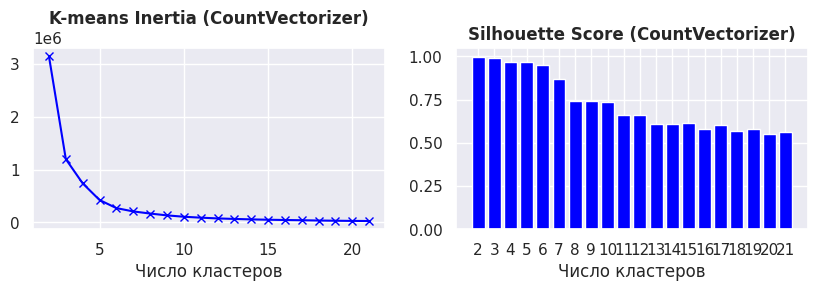

In [27]:
# @title Визуализируем
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1, rc={'figure.figsize':(10,8)})
# fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(10,5))

# CountVectorizer
plt.subplot(3, 2, 1) # аргументы: nrows, ncols, index

plt.plot(range(2,len(inertia_count)+2), inertia_count, marker='x',color='blue')
# первый параметр = x (число шагов= числу кластеров), второй = y (инерция)

plt.xlabel('Число кластеров')
plt.title('K-means Inertia (CountVectorizer)',fontweight='bold')
plt.grid(True)

plt.subplot(3, 2, 2) # аргументы: nrows, ncols, index

plt.bar(range(len(silhouette_count)), list(silhouette_count.values()), align='center',color= 'blue')
plt.xticks(range(len(silhouette_count)), list(silhouette_count.keys())) # отметки на шкале
plt.grid(True)
plt.title('Silhouette Score (CountVectorizer)',fontweight='bold')
plt.xlabel('Число кластеров')

In [21]:
# @title Вычисляем инерцию для разного количества кластеров (от 2 до 20) для X_tfidf_pca2

# https://scikit-learn.org/stable/modules/clustering.html#k-means

import sklearn.cluster as cluster
from tqdm import tqdm

# inertia = {} # сюда будем сохранять значения
inertia_tfidf = []
for i in tqdm(range(2,22)): # значения интервала - число кластеров (можно изменять)

    kmeans = cluster.KMeans(
               n_clusters=i, # инициализируем модель
               init='k-means++', # метод, как разбросать центры среди данных
               n_init=15, # сколько раз будем переопределять центры (в результате выберем самый успешный)
               max_iter=500, # количество итераций а один проход алгоритма
               random_state=17 # сколько раз датасет перемешан перед кластеризацией
    )


    kmeans.fit(X_tfidf_pca2) # обучаем модель
    inertia_tfidf.append(kmeans.inertia_) # добавляем значения инерции для каждого числа кластеров
    # inertia.update({i:kmeans.inertia_})

# print(inertia)

100%|██████████| 20/20 [00:22<00:00,  1.13s/it]


In [22]:
# @title Вычисляем силуэт для разного количества кластеров (от 2 до 20) для X_tfidf_pca2
from sklearn.metrics import silhouette_score

# все как в предыдущей ячейке, только силуэт-скоры сохраняем как значения в словаре
silhouette_tfidf = {}
for i in tqdm(range(2,22)):
    kmeans = cluster.KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(X_tfidf_pca2)

    silhouette_tfidf[i] = silhouette_score(X_tfidf_pca2, kmeans.labels_, metric='euclidean')

100%|██████████| 20/20 [02:42<00:00,  8.10s/it]


Text(0.5, 0, 'Число кластеров')

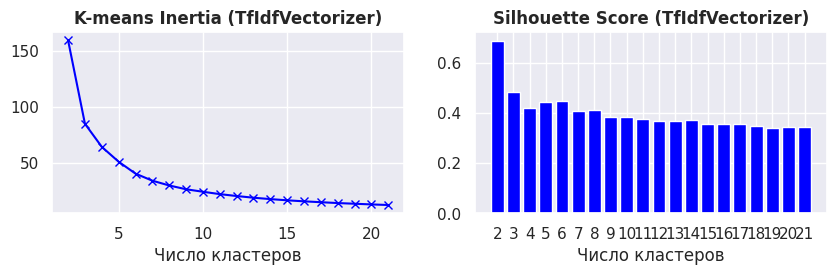

In [28]:
# TfIdfVectorizer
plt.subplot(3, 2, 3) # аргументы: nrows, ncols, index

plt.plot(range(2,len(inertia_tfidf)+2), inertia_tfidf, marker='x',color='blue')
# первый параметр = x (число шагов= числу кластеров), второй = y (инерция)

plt.xlabel('Число кластеров')
plt.title('K-means Inertia (TfIdfVectorizer)',fontweight='bold')
plt.grid(True)

plt.subplot(3, 2, 4) # аргументы: nrows, ncols, index

plt.bar(range(len(silhouette_tfidf)), list(silhouette_tfidf.values()), align='center',color= 'blue')
plt.xticks(range(len(silhouette_tfidf)), list(silhouette_tfidf.keys())) # отметки на шкале
plt.grid(True)
plt.title('Silhouette Score (TfIdfVectorizer)',fontweight='bold')
plt.xlabel('Число кластеров')

In [24]:
# @title Вычисляем инерцию для разного количества кластеров (от 2 до 20) для X_glove

# https://scikit-learn.org/stable/modules/clustering.html#k-means

import sklearn.cluster as cluster
from tqdm import tqdm

# inertia = {} # сюда будем сохранять значения
inertia_glove = []
for i in tqdm(range(2,22)): # значения интервала - число кластеров (можно изменять)

    kmeans = cluster.KMeans(
               n_clusters=i, # инициализируем модель
               init='k-means++', # метод, как разбросать центры среди данных
               n_init=15, # сколько раз будем переопределять центры (в результате выберем самый успешный)
               max_iter=500, # количество итераций а один проход алгоритма
               random_state=17 # сколько раз датасет перемешан перед кластеризацией
    )


    kmeans.fit(pd.DataFrame(X_glove)) # обучаем модель
    inertia_glove.append(kmeans.inertia_) # добавляем значения инерции для каждого числа кластеров
    # inertia.update({i:kmeans.inertia_})

# print(inertia)

100%|██████████| 20/20 [00:13<00:00,  1.47it/s]


In [29]:
# @title Вычисляем силуэт для разного количества кластеров (от 2 до 20) для X_glove
from sklearn.metrics import silhouette_score

# все как в предыдущей ячейке, только силуэт-скоры сохраняем как значения в словаре
silhouette_glove = {}
for i in tqdm(range(2,22)):
    kmeans = cluster.KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(pd.DataFrame(X_glove))

    silhouette_glove[i] = silhouette_score(pd.DataFrame(X_glove), kmeans.labels_, metric='euclidean')

100%|██████████| 20/20 [03:20<00:00, 10.01s/it]


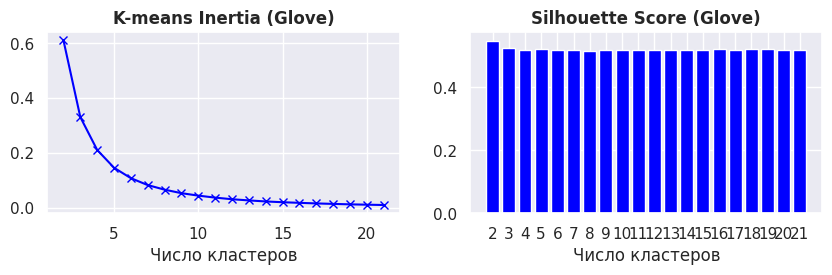

In [30]:
# Glove
plt.subplot(3, 2, 5) # аргументы: nrows, ncols, index

plt.plot(range(2,len(inertia_glove)+2), inertia_glove, marker='x',color='blue')
# первый параметр = x (число шагов= числу кластеров), второй = y (инерция)

plt.xlabel('Число кластеров')
plt.title('K-means Inertia (Glove)',fontweight='bold')
plt.grid(True)

plt.subplot(3, 2, 6) # аргументы: nrows, ncols, index

plt.bar(range(len(silhouette_glove)), list(silhouette_glove.values()), align='center',color= 'blue')
plt.xticks(range(len(silhouette_glove)), list(silhouette_glove.keys())) # отметки на шкале
plt.grid(True)
plt.title('Silhouette Score (Glove)',fontweight='bold')
plt.xlabel('Число кластеров')


plt.show()

Вывод: будем делить тексты на 2 кластера (хотя выглядит это соминтельно)

## Кластеризируем

In [31]:
import sklearn.cluster as cluster

kmeans = cluster.KMeans(n_clusters=2,random_state=42,init='k-means++')

In [32]:
# @title CountVectorizer
kmeans_labels_count = kmeans.fit_predict(X_count_pca2)
# вычисляем центры кластеров и предугадываем номер кластера для каждого семпла данных

centroids_count = kmeans.cluster_centers_

display(pd.Series(kmeans_labels_count).value_counts()) # кол-во вин по кластерам

,count
0,22100
1,23


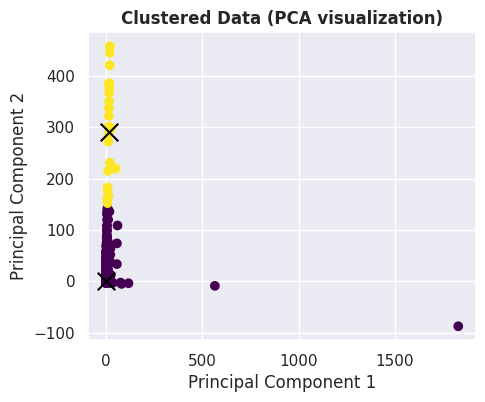

In [33]:
sns.set( rc={'figure.figsize':(5,4)},font_scale=1)

plt.scatter(x=X_count_pca2[:, 0], y=X_count_pca2[:, 1], c=kmeans_labels_count, cmap='viridis')
plt.scatter(centroids_count[:, 0], centroids_count[:, 1],
            marker='x', s=160, color='black')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# добавить легенду

plt.title('Clustered Data (PCA visualization)',fontweight='bold')

plt.show()

In [34]:
# силуэты: определяется на промежутке [-1;1] (чем выше тем лучше)

# инерция: определяется на [0, inf) (чем ниже тем лучше)

print("Inertia score: %0.1f" % kmeans.inertia_,
     "\nSilhouette score: %0.1f" % silhouette_score(X_count_pca2, kmeans.labels_, metric='euclidean'))

Inertia score: 4550075.8 
Silhouette score: 1.0


In [35]:
from sklearn.metrics import pairwise_distances_argmin_min

closest, _ = pairwise_distances_argmin_min(centroids_count, X_count_pca2)
closest

array([10105, 11450])

In [36]:
# Тексты, ближайший к центроиду 1
df.iloc[closest[0]]['text']

'KeycloakStrategy invalid token ECONNREFUSED Client: {  transitional: {    silentJSONParsing: true,    forcedJSONParsing: true,    clarifyTimeoutError: false  },  adapter: [Function: httpAdapter],  transformRequest: [ [Function: transformRequest] ],  transformResponse: [ [Function: transformResponse] ],  timeout: 30000,  xsrfCookieName: \'XSRF-TOKEN\',  xsrfHeaderName: \'X-XSRF-TOKEN\',  maxContentLength: -1,  maxBodyLength: -1,  validateStatus: [Function: validateStatus],  headers: {    common: { Accept: \'application/json, text/plain, */*\' },    delete: {},    get: {},    head: {},    post: { \'Content-Type\': \'application/x-www-form-urlencoded\' },    put: { \'Content-Type\': \'application/x-www-form-urlencoded\' },    patch: { \'Content-Type\': \'application/x-www-form-urlencoded\' }  },  baseURL: \'http://localhost:3000/\'}[Nest] 36736   - 23/08/2023, 09:54:39   [KeycloakStrategy] Invalid token message=connect ECONNREFUSED 127.0.0.1:80 +4124ms[Nest] 36736   - 23/08/2023, 09:54:4

In [37]:
# Тексты, ближайший к центроиду 2
df.iloc[closest[1]]['text']

'Spring and com.fasterxml.jackson.dataformat:jackson-dataformat-xml object mapping errors I have built a simple microservice using Spring Boot 3.0.9 and Spring Cloud 2022.0.4. A REST controller that accepts JSON payload POSTed to it works until I add the com.fasterxml.jackson.dataformat:jackson-dataformat-xml dependency. When I add this dependency, I receive the following error:java.lang.Exception: org.springframework.http.converter.HttpMessageNotReadableException: JSON parse error: Unexpected character \'{\' (code 123) in prolog; expected \'<\' at [row,col {unknown-source}]: [1,1]        at com.example.web.exception.response.RestResponseEntityExceptionHandler.handle(RestResponseEntityExceptionHandler.java:283)        at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)        at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(Unknown Source)        at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(Unknown Source)        a

In [38]:
# @title TfIdfVectorizer
kmeans_labels_tfidf = kmeans.fit_predict(X_tfidf_pca2)
# вычисляем центры кластеров и предугадываем номер кластера для каждого семпла данных

centroids_tfidf = kmeans.cluster_centers_

display(pd.Series(kmeans_labels_tfidf).value_counts()) # кол-во вин по кластерам

,count
0,20426
1,1697


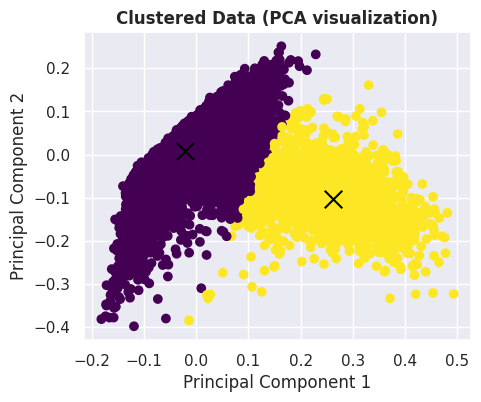

In [39]:
sns.set( rc={'figure.figsize':(5,4)},font_scale=1)

plt.scatter(x=X_tfidf_pca2[:, 0], y=X_tfidf_pca2[:, 1], c=kmeans_labels_tfidf, cmap='viridis')
plt.scatter(centroids_tfidf[:, 0], centroids_tfidf[:, 1],
            marker='x', s=160, color='black')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# добавить легенду

plt.title('Clustered Data (PCA visualization)',fontweight='bold')

plt.show()

In [40]:
# силуэты: определяется на промежутке [-1;1] (чем выше тем лучше)

# инерция: определяется на [0, inf) (чем ниже тем лучше)

print("Inertia score: %0.1f" % kmeans.inertia_,
     "\nSilhouette score: %0.1f" % silhouette_score(X_tfidf_pca2, kmeans.labels_, metric='euclidean'))

Inertia score: 159.5 
Silhouette score: 0.7


In [41]:
from sklearn.metrics import pairwise_distances_argmin_min

closest, _ = pairwise_distances_argmin_min(centroids_tfidf, X_tfidf_pca2)
closest

array([12546,  5679])

In [42]:
# Тексты, ближайший к центроиду 1
df.iloc[closest[0]]['text']

'Using CUDA 11.x but getting error: Unknown CUDA arch (8.0) or GPU not supported possibly a very simple error but wanted to ask as I am unable to understand what the issue is or find an appropriate solution.I am working on Ubuntu 22.04.2 LTS and while checking nvcc -V, I see: Build cuda_11.2.r11.2/compiler.29618528_0With nvidia-smi, I see: NVIDIA-SMI 470.182.03 Driver Version: 470.182.03 CUDA Version: 11.4If I am reading the NVIDIA docs correctly, everything should be compatible.https://docs.nvidia.com/deploy/cuda-compatibility/What am I missing? Why is this error popping up?...torch/utils/cpp_extension.py", line 991, in _get_cuda_arch_flags raise ValueError("Unknown CUDA arch ({}) or GPU not supported".format(arch)) ValueError: Unknown CUDA arch (8.0) or GPU not supportedAny help and especially explanation would be appreciated as I am none the wiser from the other posts.Short description above'

In [43]:
# Тексты, ближайший к центроиду 2
df.iloc[closest[1]]['text']

"Is there any source code available of app store [closed] Closed. This question is seeking recommendations for books, tools, software libraries, and more. It does not meet Stack Overflow guidelines. It is not currently accepting answers.We don’t allow questions seeking recommendations for books, tools, software libraries, and more. You can edit the question so it can be answered with facts and citations.Closed 2 days ago.Improve this questionactually I need an Real working of actual design of app store ui in html css js the ios 16 ui one. Either if anyone have pc can you help me to convert the app store ui sketch project in html css please? Here I'll upload the link of it.https://iambhvsh.vercel.app/document_files/ios-11-app-store-nathanstreater.sketchPlease help me brother and sisters.I tried doing it but didn't found any solution please help"

In [44]:
# @title Glove
kmeans_labels_glove = kmeans.fit_predict(pd.DataFrame(X_glove))
# вычисляем центры кластеров и предугадываем номер кластера для каждого семпла данных

centroids_glove = kmeans.cluster_centers_

display(pd.Series(kmeans_labels_glove).value_counts()) # кол-во вин по кластерам

,count
0,12711
1,9412


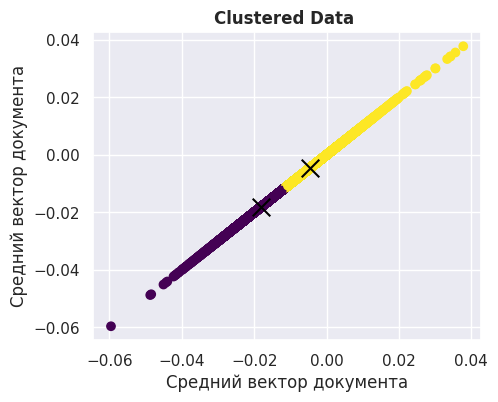

In [45]:
sns.set( rc={'figure.figsize':(5,4)},font_scale=1)

plt.scatter(X_glove, X_glove, c=kmeans_labels_glove, cmap='viridis')
plt.scatter(centroids_glove[:, 0], centroids_glove[:, 0],
            marker='x', s=160, color='black')

plt.xlabel('Средний вектор документа')
plt.ylabel('Средний вектор документа')
# добавить легенду

plt.title('Clustered Data ',fontweight='bold')

plt.show()

In [46]:
# силуэты: определяется на промежутке [-1;1] (чем выше тем лучше)

# инерция: определяется на [0, inf) (чем ниже тем лучше)

print("Inertia score: %0.1f" % kmeans.inertia_,
     "\nSilhouette score: %0.1f" % silhouette_score(pd.DataFrame(X_glove), kmeans.labels_, metric='euclidean'))

Inertia score: 0.6 
Silhouette score: 0.5


In [47]:
from sklearn.metrics import pairwise_distances_argmin_min

closest, _ = pairwise_distances_argmin_min(centroids_glove, pd.DataFrame(X_glove))
closest

array([10915, 12156])

In [48]:
# Тексты, ближайший к центроиду 1
df.iloc[closest[0]]['text']

'How do I create an Azure Function App v4 using Azure Resource Manager API Consider the following code that worked for function apps prior to v4:var bindingsConfig = new{    bindings = new object[]        {            new            {                AuthLevel = "function",                Type = "httpTrigger",                Direction = "in",                Name = "request",                Methods = new[] {"post"}            },            new            {                Type = "http",                Direction = "out",                Name = "$return"            }        }};app = await myResourceGroup.GetWebSites().GetAsync("my-app-name", ct);var func = await app.GetSiteFunctions().CreateOrUpdateAsync(WaitUntil.Completed, "my-func-name", new FunctionEnvelopeData{    Config = BinaryData.FromObjectAsJson(config)}, ct);Now according to this doc, function.json is no longer used in v4 programming model. My question is - does it mean I shouldn\'t be passing bindingsConfig into CreateOrUpdateAsy

In [49]:
# Тексты, ближайший к центроиду 2
df.iloc[closest[1]]['text']

'Papermill Azure Function App: "No such kernel named python3" when executing a notebook I am trying to develop an Azure function app that executes jupyter notebooks stored in blob storage through papermill. It\'s all working up until the point of papermill.execute_notebook(...) where I then get the following error:File "/home/site/wwwroot/.python_packages/lib/site-packages/jupyter_client/kernelspec.py", line 287, in get_kernel_spec    raise NoSuchKernel(kernel_name)jupyter_client.kernelspec.NoSuchKernel: No such kernel named python3For testing purposes, I am doing a very simple notebook that just accepts two parameters ["name", "age"] and inserts them into a sql table. My code below (written in python 3.8) is simply passing a name and age into the papermill.execute_notebook(<notebook_path>). I have tested that notebook and it works fine. It\'s just when I try and run it through papermill, I get the error "No such kernel named python3".    blob_service_client = BlobServiceClient.from_co

## Обрабатываем тексты в надежде, что это поможет разбить тексты на более внятные кластеры

In [85]:
import spacy
from string import punctuation
from spacy.lang.en import stop_words

stop_words = list(stop_words.STOP_WORDS) + list(punctuation)

# Load the spaCy English model
nlp = spacy.load('en_core_web_sm')

def tokenize(text):
    sentence = nlp(text)
    # lemmatizing
    sentence = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" and word.lower_ not in stop_words else word.lower_ for word in sentence ]
    return sentence

In [86]:
df['bag'] = df['text'].apply(tokenize)
df

,Title,URL,Question,Categories,text,bag
0,your browser version is not supported using sy...,https://stackoverflow.com/questions/76981459/y...,I'm trying to automate some features and I nee...,"['php', 'symfony', 'web-scraping']",your browser version is not supported using sy...,"[your, browser, version, is, not, support, usi..."
1,how to get button text value in java,https://stackoverflow.com/questions/76981456/h...,I want to get button text value to do the on c...,"['java', 'button']",how to get button text value in java I want to...,"[how, to, get, button, text, value, in, java, ..."
2,How to make sure communication is stable when ...,https://stackoverflow.com/questions/76981455/h...,This is my Node codeasync function runClient()...,"['javascript', 'node.js', 'go', 'zeromq']",How to make sure communication is stable when ...,"[how, to, make, sure, communication, is, stabl..."
3,Cubical Agda Inclusion Order,https://stackoverflow.com/questions/76981453/c...,I'm almost finished defining an Inclusion Orde...,['agda'],Cubical Agda Inclusion Order I'm almost finish...,"[cubical, agda, inclusion, order, i, 'm, almos..."
4,How to convert depth map to image(.png) format...,https://stackoverflow.com/questions/76981450/h...,I am using a depth camera which captures a 500...,"['3d', 'computer-vision', 'point-clouds', 'vis...",How to convert depth map to image(.png) format...,"[how, to, convert, depth, map, to, image(.png,..."
...,...,...,...,...,...,...
22118,SqlAzureDacpacDeployment@1 - parameter problem,https://stackoverflow.com/questions/76933724/s...,I have the following devops task in my pipelin...,"['powershell', 'azure-devops']",SqlAzureDacpacDeployment@1 - parameter problem...,"[sqlazuredacpacdeployment@1, -, parameter, pro..."
22119,How do I instantiate structs inside a nested c...,https://stackoverflow.com/questions/76933723/h...,So I googled everywhere and cannot get a strai...,"['c++', 'struct', 'nested', 'inner-classes']",How do I instantiate structs inside a nested c...,"[how, do, i, instantiate, struct, inside, a, n..."
22120,How to reverse_lazy user in template view's ge...,https://stackoverflow.com/questions/76933722/h...,Does anyone know how I can redirect the user t...,"['django', 'django-models', 'django-views', 'd...",How to reverse_lazy user in template view's ge...,"[how, to, reverse_lazy, user, in, template, vi..."
22121,"""undefined reference to `GOACC_parallel_keyed'...",https://stackoverflow.com/questions/76933719/u...,I am working on a project where I have to opti...,"['fortran', 'linker-errors', 'openacc']","""undefined reference to `GOACC_parallel_keyed'...","["", undefined, reference, to, `, goacc_paralle..."


In [91]:
def remove_stopw(lst):
  res = []
  for w in lst:
    if w not in stop_words:
      res.append(w)
  return res
df['bag_cleaned'] = df['bag'].apply(remove_stopw)

In [92]:
# @title Векторизуем text с помощью CountVectorizer
countvec = CountVectorizer(analyzer=lambda x: x)

X_count = countvec.fit_transform(df['bag_cleaned'])

In [93]:
X_count

<22123x478798 sparse matrix of type '<class 'numpy.int64'>'
	with 1675804 stored elements in Compressed Sparse Row format>

In [94]:
# @title Векторизуем text с помощью TfidfVectorizer
tfidfvec = TfidfVectorizer(analyzer=lambda x: x)

X_tfidf = tfidfvec.fit_transform(df['bag_cleaned'])

In [95]:
X_tfidf

<22123x478798 sparse matrix of type '<class 'numpy.float64'>'
	with 1675804 stored elements in Compressed Sparse Row format>

In [96]:
def get_glove_vec_preprocessed(lst):
  res = []
  for t in lst:
    try:
      res.append(model[t])
    except KeyError:
      pass
  return np.mean(res)

In [97]:
X_glove = df['bag_cleaned'].apply(get_glove_vec_preprocessed)
X_glove

,bag_cleaned
0,0.006430
1,-0.016381
2,0.008351
3,0.012812
4,0.020092
...,...
22118,0.025424
22119,0.008887
22120,-0.014950
22121,-0.000701


In [98]:
# @title Уменьшем размерность датасетов X_tfidf и X_count
from sklearn.decomposition import PCA
pca_2 = PCA(2) # задали количество компонент

X_tfidf_pca2 = pca_2.fit_transform(X_tfidf)

X_tfidf_pca2.shape # массив длиной в кол-во строк датасета и шириной по числу компонент

(22123, 2)

In [99]:
X_count_pca2 = pca_2.fit_transform(X_count)

X_count_pca2.shape # массив длиной в кол-во строк датасета и шириной по числу компонент

(22123, 2)

In [100]:
# @title Вычисляем инерцию для разного количества кластеров (от 2 до 20) X_count

# https://scikit-learn.org/stable/modules/clustering.html#k-means

import sklearn.cluster as cluster
from tqdm import tqdm

# inertia = {} # сюда будем сохранять значения
inertia_count = []
for i in tqdm(range(2,22)): # значения интервала - число кластеров (можно изменять)

    kmeans = cluster.KMeans(
               n_clusters=i, # инициализируем модель
               init='k-means++', # метод, как разбросать центры среди данных
               n_init=15, # сколько раз будем переопределять центры (в результате выберем самый успешный)
               max_iter=500, # количество итераций а один проход алгоритма
               random_state=17 # сколько раз датасет перемешан перед кластеризацией
    )


    kmeans.fit(X_count_pca2) # обучаем модель
    inertia_count.append(kmeans.inertia_) # добавляем значения инерции для каждого числа кластеров
    # inertia.update({i:kmeans.inertia_})

# print(inertia)

100%|██████████| 20/20 [00:15<00:00,  1.26it/s]


In [101]:
# @title Вычисляем силуэт для разного количества кластеров (от 2 до 20) для X_count
from sklearn.metrics import silhouette_score

# все как в предыдущей ячейке, только силуэт-скоры сохраняем как значения в словаре
silhouette_count = {}
for i in tqdm(range(2,22)):
    kmeans = cluster.KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(X_count_pca2)

    silhouette_count[i] = silhouette_score(X_count_pca2, kmeans.labels_, metric='euclidean')

100%|██████████| 20/20 [02:47<00:00,  8.40s/it]


Text(0.5, 0, 'Число кластеров')

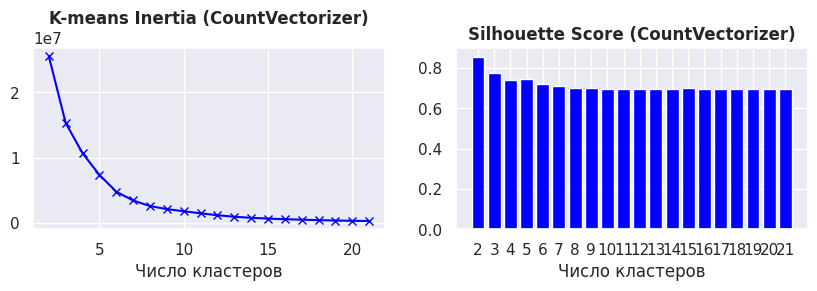

In [102]:
# @title Визуализируем
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1, rc={'figure.figsize':(10,8)})
# fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(10,5))

# CountVectorizer
plt.subplot(3, 2, 1) # аргументы: nrows, ncols, index

plt.plot(range(2,len(inertia_count)+2), inertia_count, marker='x',color='blue')
# первый параметр = x (число шагов= числу кластеров), второй = y (инерция)

plt.xlabel('Число кластеров')
plt.title('K-means Inertia (CountVectorizer)',fontweight='bold')
plt.grid(True)

plt.subplot(3, 2, 2) # аргументы: nrows, ncols, index

plt.bar(range(len(silhouette_count)), list(silhouette_count.values()), align='center',color= 'blue')
plt.xticks(range(len(silhouette_count)), list(silhouette_count.keys())) # отметки на шкале
plt.grid(True)
plt.title('Silhouette Score (CountVectorizer)',fontweight='bold')
plt.xlabel('Число кластеров')

In [103]:
# @title Вычисляем инерцию для разного количества кластеров (от 2 до 20) для X_tfidf_pca2

# https://scikit-learn.org/stable/modules/clustering.html#k-means

import sklearn.cluster as cluster
from tqdm import tqdm

# inertia = {} # сюда будем сохранять значения
inertia_tfidf = []
for i in tqdm(range(2,22)): # значения интервала - число кластеров (можно изменять)

    kmeans = cluster.KMeans(
               n_clusters=i, # инициализируем модель
               init='k-means++', # метод, как разбросать центры среди данных
               n_init=15, # сколько раз будем переопределять центры (в результате выберем самый успешный)
               max_iter=500, # количество итераций а один проход алгоритма
               random_state=17 # сколько раз датасет перемешан перед кластеризацией
    )


    kmeans.fit(X_tfidf_pca2) # обучаем модель
    inertia_tfidf.append(kmeans.inertia_) # добавляем значения инерции для каждого числа кластеров
    # inertia.update({i:kmeans.inertia_})

# print(inertia)

100%|██████████| 20/20 [00:16<00:00,  1.18it/s]


In [104]:
# @title Вычисляем силуэт для разного количества кластеров (от 2 до 20) для X_tfidf_pca2
from sklearn.metrics import silhouette_score

# все как в предыдущей ячейке, только силуэт-скоры сохраняем как значения в словаре
silhouette_tfidf = {}
for i in tqdm(range(2,22)):
    kmeans = cluster.KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(X_tfidf_pca2)

    silhouette_tfidf[i] = silhouette_score(X_tfidf_pca2, kmeans.labels_, metric='euclidean')

100%|██████████| 20/20 [02:37<00:00,  7.89s/it]


Text(0.5, 0, 'Число кластеров')

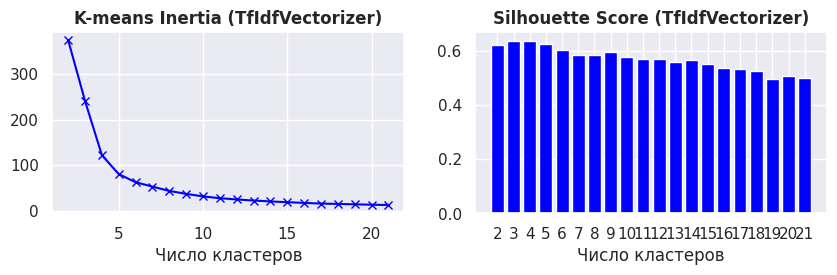

In [105]:
# TfIdfVectorizer
plt.subplot(3, 2, 3) # аргументы: nrows, ncols, index

plt.plot(range(2,len(inertia_tfidf)+2), inertia_tfidf, marker='x',color='blue')
# первый параметр = x (число шагов= числу кластеров), второй = y (инерция)

plt.xlabel('Число кластеров')
plt.title('K-means Inertia (TfIdfVectorizer)',fontweight='bold')
plt.grid(True)

plt.subplot(3, 2, 4) # аргументы: nrows, ncols, index

plt.bar(range(len(silhouette_tfidf)), list(silhouette_tfidf.values()), align='center',color= 'blue')
plt.xticks(range(len(silhouette_tfidf)), list(silhouette_tfidf.keys())) # отметки на шкале
plt.grid(True)
plt.title('Silhouette Score (TfIdfVectorizer)',fontweight='bold')
plt.xlabel('Число кластеров')

In [106]:
# @title Вычисляем инерцию для разного количества кластеров (от 2 до 20) для X_glove

# https://scikit-learn.org/stable/modules/clustering.html#k-means

import sklearn.cluster as cluster
from tqdm import tqdm

# inertia = {} # сюда будем сохранять значения
inertia_glove = []
for i in tqdm(range(2,22)): # значения интервала - число кластеров (можно изменять)

    kmeans = cluster.KMeans(
               n_clusters=i, # инициализируем модель
               init='k-means++', # метод, как разбросать центры среди данных
               n_init=15, # сколько раз будем переопределять центры (в результате выберем самый успешный)
               max_iter=500, # количество итераций а один проход алгоритма
               random_state=17 # сколько раз датасет перемешан перед кластеризацией
    )


    kmeans.fit(pd.DataFrame(X_glove)) # обучаем модель
    inertia_glove.append(kmeans.inertia_) # добавляем значения инерции для каждого числа кластеров
    # inertia.update({i:kmeans.inertia_})

# print(inertia)

100%|██████████| 20/20 [00:13<00:00,  1.44it/s]


In [107]:
# @title Вычисляем силуэт для разного количества кластеров (от 2 до 20) для X_glove
from sklearn.metrics import silhouette_score

# все как в предыдущей ячейке, только силуэт-скоры сохраняем как значения в словаре
silhouette_glove = {}
for i in tqdm(range(2,22)):
    kmeans = cluster.KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(pd.DataFrame(X_glove))

    silhouette_glove[i] = silhouette_score(pd.DataFrame(X_glove), kmeans.labels_, metric='euclidean')

100%|██████████| 20/20 [03:12<00:00,  9.63s/it]


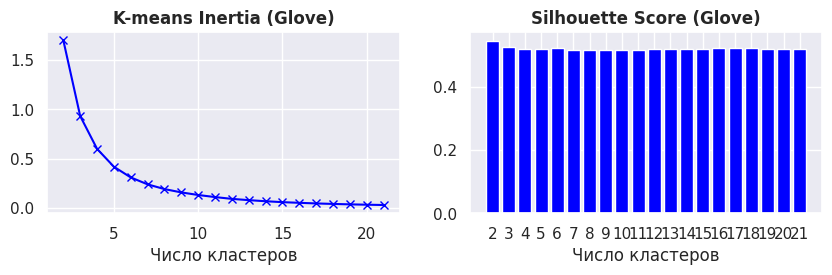

In [108]:
# Glove
plt.subplot(3, 2, 5) # аргументы: nrows, ncols, index

plt.plot(range(2,len(inertia_glove)+2), inertia_glove, marker='x',color='blue')
# первый параметр = x (число шагов= числу кластеров), второй = y (инерция)

plt.xlabel('Число кластеров')
plt.title('K-means Inertia (Glove)',fontweight='bold')
plt.grid(True)

plt.subplot(3, 2, 6) # аргументы: nrows, ncols, index

plt.bar(range(len(silhouette_glove)), list(silhouette_glove.values()), align='center',color= 'blue')
plt.xticks(range(len(silhouette_glove)), list(silhouette_glove.keys())) # отметки на шкале
plt.grid(True)
plt.title('Silhouette Score (Glove)',fontweight='bold')
plt.xlabel('Число кластеров')


plt.show()

Попробуем разделить тексты, векторизированные TfIdfVectorizer на 3 кластера, и на 2 -- тексты, векторизированные другими способами

In [144]:
import sklearn.cluster as cluster

In [149]:
# @title CountVectorizer
kmeans2 = cluster.KMeans(n_clusters=2,random_state=42,init='k-means++')
kmeans_labels_count = kmeans2.fit_predict(X_count_pca2)
# вычисляем центры кластеров и предугадываем номер кластера для каждого семпла данных

centroids_count = kmeans2.cluster_centers_

display(pd.Series(kmeans_labels_count).value_counts()) # кол-во вин по кластерам

,count
1,21172
0,951


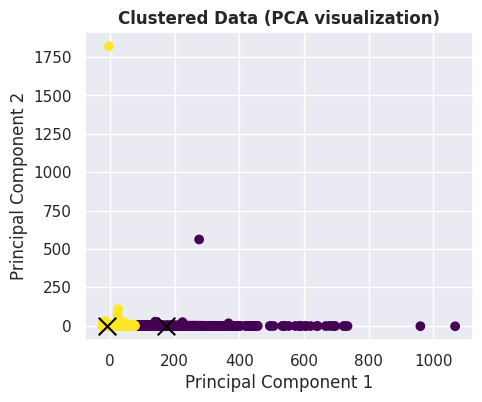

In [150]:
sns.set( rc={'figure.figsize':(5,4)},font_scale=1)

plt.scatter(x=X_count_pca2[:, 0], y=X_count_pca2[:, 1], c=kmeans_labels_count, cmap='viridis')
plt.scatter(centroids_count[:, 0], centroids_count[:, 1],
            marker='x', s=160, color='black')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# добавить легенду

plt.title('Clustered Data (PCA visualization)',fontweight='bold')

plt.show()

In [151]:
# силуэты: определяется на промежутке [-1;1] (чем выше тем лучше)

# инерция: определяется на [0, inf) (чем ниже тем лучше)

print("Inertia score: %0.1f" % kmeans2.inertia_,
     "\nSilhouette score: %0.1f" % silhouette_score(X_count_pca2, kmeans2.labels_, metric='euclidean'))

Inertia score: 25468949.8 
Silhouette score: 0.9


Было:
```
Inertia score: 4550075.8
Silhouette score: 1.0
```

Стало:
```
Inertia score: 25468949.8
Silhouette score: 0.9
```

In [130]:
from sklearn.metrics import pairwise_distances_argmin_min

closest, _ = pairwise_distances_argmin_min(centroids_count, X_count_pca2)
closest

array([18541,  7507])

In [131]:
# Тексты, ближайший к центроиду 1
df.iloc[closest[0]]['text']

'Why does my microk8s AdGuard Home container need to be reconfigured every time it shuts down? I\'m having experiencing an issue with my AGH pod where it has to be reconfigured every time the container shuts down; be it manually, or at server restart.These are the various YAMLs:Namespace---apiVersion: v1kind: Namespacemetadata:  name: adguardPV---apiVersion: v1kind: PersistentVolumemetadata:  name: adguard-data-pv  namespace: adguardspec:  capacity:    storage: 1Gi  accessModes:    - ReadWriteOnce  persistentVolumeReclaimPolicy: Retain  hostPath:    path: "/tank/apps/adguard/data"---apiVersion: v1kind: PersistentVolumemetadata:  name: adguard-conf-pv  namespace: adguardspec:  capacity:    storage: 1Gi  accessModes:    - ReadWriteOnce  persistentVolumeReclaimPolicy: Retain  hostPath:    path: "/tank/apps/adguard/conf"PVC---apiVersion: v1kind: PersistentVolumeClaimmetadata:  name: adguard-data-pvc  namespace: adguardspec:  accessModes:    - ReadWriteOnce  resources:    requests:      sto

In [132]:
# Тексты, ближайший к центроиду 2
df.iloc[closest[1]]['text']

'Program to find the Set of Subsets using Iteration in Java. Issue: Two ArrayLists happen to share the same Address. Help to Debug Intro: Below is the program to find the set of subsets, using iteration, in Java.Issue: The ans is also getting updated with the new value when only ansCopy is attempted to update.For example, I take a value as {5,4,6}. In the first iteration, 5 gets appended in the first inner array list of ansCopy. But to the surprise the first inner array list of ans also gets appended by 5.Maybe, the two ArrayList ans and ansCopy happen to share the same address.Requirement: Can someone explain why this is happening and help me to debug it!public static ArrayList<ArrayList<Integer> > subsetUsingIteration2(int[] a) {    ArrayList<ArrayList<Integer> > ans=new ArrayList<ArrayList<Integer> >();    ans.add(new ArrayList<Integer>());     // ArrayList<ArrayList<Integer> > ans={{}};    ArrayList<ArrayList<Integer> > ansCopy=new ArrayList<ArrayList<Integer> >();    // ArrayList<

In [152]:
# @title TfIdfVectorizer
kmeans3 = cluster.KMeans(n_clusters=3,random_state=42,init='k-means++')
kmeans_labels_tfidf = kmeans3.fit_predict(X_tfidf_pca2)
# вычисляем центры кластеров и предугадываем номер кластера для каждого семпла данных

centroids_tfidf = kmeans3.cluster_centers_

display(pd.Series(kmeans_labels_tfidf).value_counts()) # кол-во вин по кластерам

,count
1,12390
2,6055
0,3678


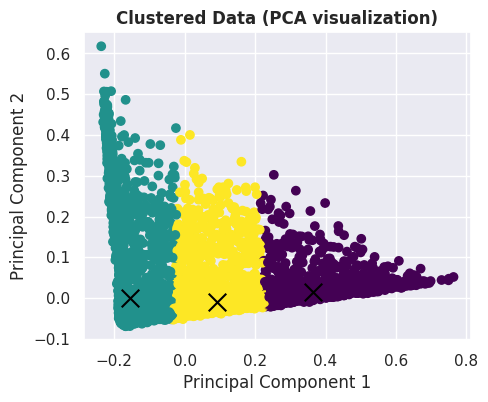

In [153]:
sns.set( rc={'figure.figsize':(5,4)},font_scale=1)

plt.scatter(x=X_tfidf_pca2[:, 0], y=X_tfidf_pca2[:, 1], c=kmeans_labels_tfidf, cmap='viridis')
plt.scatter(centroids_tfidf[:, 0], centroids_tfidf[:, 1],
            marker='x', s=160, color='black')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# добавить легенду

plt.title('Clustered Data (PCA visualization)',fontweight='bold')

plt.show()

In [154]:
# силуэты: определяется на промежутке [-1;1] (чем выше тем лучше)

# инерция: определяется на [0, inf) (чем ниже тем лучше)

print("Inertia score: %0.1f" % kmeans3.inertia_,
     "\nSilhouette score: %0.1f" % silhouette_score(X_tfidf_pca2, kmeans3.labels_, metric='euclidean'))

Inertia score: 249.5 
Silhouette score: 0.6


Было:
```
Inertia score: 159.5
Silhouette score: 0.7
```

Стало:
```
Inertia score: 249.5
Silhouette score: 0.6
```

In [155]:
from sklearn.metrics import pairwise_distances_argmin_min

closest, _ = pairwise_distances_argmin_min(centroids_tfidf, X_tfidf_pca2)
closest

array([11663, 16540,  6683])

In [156]:
# Тексты, ближайший к центроиду 1
df.iloc[closest[0]]['text']

'react pong game state add up wierdly I am trying to make a pong game I made a player to move by pressing w/s toward top and bottom but when I change the direction of it it bounces which I don\'t expect it bounce exponentially if you change the directionimport logo from "./logo.svg";import { useState, useEffect } from "react";import "./App.css";function App() {  const [location, setLocation] = useState(100);  document.addEventListener("keypress", (e) => handleclick(e));  const handleclick = (e) => {    const key = e.key;    console.log(key);    if (key == "w") {      setLocation((prevLocation) => prevLocation - 10);    }    if (key == "s") {      setLocation((prevLocation) => prevLocation + 10);    }  };  //! problem is when you change the direction player bounce   return (    <div className="App">      <div        className="player1"        style={{          top: location + "px",        }}      ></div>    </div>  );}export default App; There is nothing problematic in CSS so I don\'t c

In [157]:
# Тексты, ближайший к центроиду 2
df.iloc[closest[1]]['text']

'Pointer to array vs pointer I examined a lot question that asked in stackoverflow but ı didn\'t get exact answer of my question. Btw,my question is about C.int a[10] = {0,1,2,3,4,5,6,7,8,9};int (*p)[10]; // ı know it is pointer to int array that consist of 10 elements.int *d;d = a;p = &a; // it is array typeprintf("*p = %p , p = %d", (void *)*p, (void*)p); // it prints same thing, start address of "a" array printf("*d = %p, d = %p",*d,d); // it prints a[0] and start address of a respectively.I know already "p" is a array typed but actually it is a pointer for array (it occupy 8 bytes in memory like "d" with address data in most of systems). When ı dereference "p", ı expect "a[0]". Someway compiler handle it and returns address data of "a" array. But why? Is this about standart or historically thing? Because ı didn\'t find any reason why compiler does that. It could be normally dereference it like as "d".'

In [159]:
# Тексты, ближайший к центроиду 3
df.iloc[closest[2]]['text']

"Best way to display widgets outside of the main Scaffold? I want to display a sidebar to the right of the entire Scaffold, such that when the user navigates between routes in the Scaffold, for example using Navigator.of(context).pushNamed(), the sidebar should be unaffected. In the sidebar, I also need to have a button that displays widgets in front of the entire Scaffold.It seems simple enough to just use the MaterialApp's builder-method to surround the entire app with a Row and possibly a Stack (to be able to display things in front of the Scaffold). The problem is that there seem to be a few puzzle pieces missing when using the builder method, for example Overlay and Material. If I add them manually, it seems to work.builder: (context, child) {  return Overlay(    initialEntries: [      OverlayEntry(builder: (context){        return Row(          children: [            Expanded(child: child),            Material(child: MySideBar()),          ],        );      })    ],  );},Is this 

In [160]:
# @title Glove
kmeans2 = cluster.KMeans(n_clusters=2,random_state=42,init='k-means++')
kmeans_labels_glove = kmeans2.fit_predict(pd.DataFrame(X_glove))
# вычисляем центры кластеров и предугадываем номер кластера для каждого семпла данных

centroids_glove = kmeans2.cluster_centers_

display(pd.Series(kmeans_labels_glove).value_counts()) # кол-во вин по кластерам

,count
1,11801
0,10322


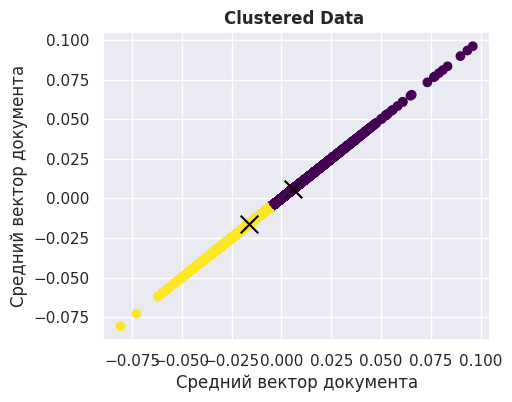

In [161]:
sns.set( rc={'figure.figsize':(5,4)},font_scale=1)

plt.scatter(X_glove, X_glove, c=kmeans_labels_glove, cmap='viridis')
plt.scatter(centroids_glove[:, 0], centroids_glove[:, 0],
            marker='x', s=160, color='black')

plt.xlabel('Средний вектор документа')
plt.ylabel('Средний вектор документа')
# добавить легенду

plt.title('Clustered Data ',fontweight='bold')

plt.show()

In [162]:
# силуэты: определяется на промежутке [-1;1] (чем выше тем лучше)

# инерция: определяется на [0, inf) (чем ниже тем лучше)

print("Inertia score: %0.1f" % kmeans2.inertia_,
     "\nSilhouette score: %0.1f" % silhouette_score(pd.DataFrame(X_glove), kmeans2.labels_, metric='euclidean'))

Inertia score: 1.7 
Silhouette score: 0.5


Было:
```
Inertia score: 0.6
Silhouette score: 0.5
```


Стало:
```
Inertia score: 1.7
Silhouette score: 0.5
```

In [163]:
from sklearn.metrics import pairwise_distances_argmin_min

closest, _ = pairwise_distances_argmin_min(centroids_glove, pd.DataFrame(X_glove))
closest

array([21923, 20932])

In [164]:
# Тексты, ближайший к центроиду 1
df.iloc[closest[0]]['text']

'Creating and displaying DynamicMesh from C++ - messed up normals of half of the faces I’m having hard times doing quite simple thing in UE, from C++ level. The goal is simple. I want to be able to display a cube. I want to specify vertices, faces and normals by hand. Hardcode it in C++, create mesh and display. And yet I can’t get it right.Full code of the project is available in this repo. Please look at the AMyActor::RegenerateMeshByHand method. https://github.com/stryku/BareBonesDynamicMesh/blob/forum-question/Source/BareBonesDynamicMesh/MyActor.cpp#L154I have a bare bones project with just a single MyActor deriving from the AActor. I create a UDynamicMeshComponent and set it as my root component. In PostLoad() I attempt to create a UE::Geometry::FDynamicMesh3 mesh and set it in my root component.It all works, the mesh is set, but it doesn’t look good. Every other face has a messed up normal and because of that half of the faces of the cube are invisible. They are visible only “fro

In [165]:
# Тексты, ближайший к центроиду 2
df.iloc[closest[1]]['text']

"geoLocation and googleMaps flutter Future<Position> getLocation() async {  Position position = await Geolocator.getCurrentPosition();  return position;}class trip extends StatefulWidget {  const trip({super.key});  @override  State<trip> createState() => tripState();}  static const CameraPosition _kGooglePlex = CameraPosition(    target: LatLng(33.8869, 9.5375),    zoom: 14.4746,  );I want to use the lat and long inside the CameraPosition's target: LatLng(lat,long) Everytime I put it the compiler signs that there is an issue in the codeI've tryed making the type double but same problem, I can't"

Улучшения хоть и есть, но частично и незначительные.

В случае кластеризации текстов, векторизированных с помощью CountVectorizer, после удаления стоп-слов и (долгой) лемматизации, и инерция, и силуэт ухудшились.

Для TfIdf-векторизованных текстов незначительно снизилась инерция, но силуэт ухудшился. Хотя на этапе подбора количества кластеров значение 2 дало силуэт, который был еще хуже.

В последнем случае с Glove силуэт не поменялся, а инерция увеличилась почти в три раза.

Скорее всего, я что-то напутала или упустила на этапе предобработки. Также возможно, что стоило попробовать большее количество кластеров (больше 20). Но пока результаты что до, что после чистки текстов, сомнительные.
